#### Miary dopasowania dla modeli regresji oraz pozostałe miary dopasowania
Przykłady na podstawie danych https://www.kaggle.com/datasets/hershyandrew/cricket-chirp-vs-temperature
czyli jak prognozować temperaturę na podstawie częstotliwości cykania świerszczy

In [2]:
import pandas as pd 
import numpy as np
import os 

path = "E:\page_ds\performance_measure"

crickets = pd.read_csv(os.path.join(path, "Cricket_chirps.csv"))

display(crickets)

,X,Y
0,88.599998,19
1,71.599998,16
2,93.300003,22
3,84.300003,17
4,80.599998,19
...,...,...
1494,81.000000,17
1495,81.000000,17
1496,86.000000,17
1497,83.000000,20


In [11]:
from sklearn.linear_model import LinearRegression

X = crickets[['Y']]
y = pd.Series(crickets['X'])

model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)

In [12]:
print(model.coef_)
print(model.intercept_)

[3.36808636]
17.967203309879302


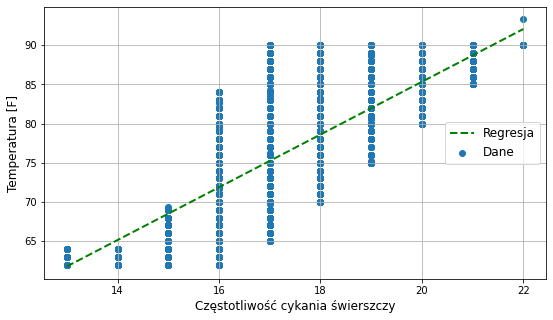

In [46]:
import matplotlib.pyplot as plt

tmp_X = range(np.min(X['Y']), np.max(X['Y'])+1, 1)
tmp_y = tmp_X*model.coef_ + model.intercept_

plt.figure(figsize=(9, 5)) 
plt.plot(tmp_X,tmp_y, color='green', linestyle='dashed',linewidth=2)
plt.scatter(X['Y'], y)
plt.legend(loc="center right", fontsize=12, labels=['Regresja','Dane']) 
plt.grid(True)  
plt.xlabel("Częstotliwość cykania świerszczy", fontsize=12)
plt.ylabel("Temperatura [F]", fontsize=12)
plt.savefig("regresja_v1.png", format='png', dpi=300, facecolor="White") 

C:\Users\krzys\AppData\Local\Temp/ipykernel_34444/4053579676.py:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]


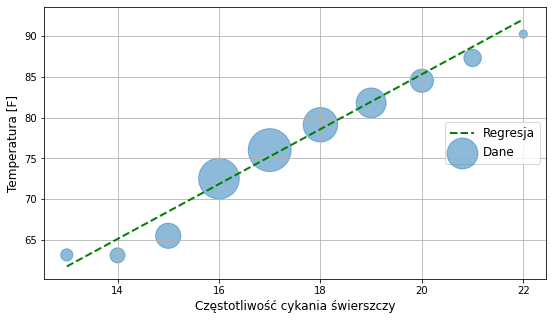

In [45]:
# drugi wykres gdzie scater plot został pogrupowany dla większej przejżystości
grouped = crickets.groupby('Y', as_index=False).agg({"X": ["mean", "count"]})
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

tmp_X = range(np.min(X['Y']), np.max(X['Y'])+1, 1)
tmp_y = tmp_X*model.coef_ + model.intercept_

plt.figure(figsize=(9, 5)) 
plt.plot(tmp_X,tmp_y, color='green', linestyle='dashed',linewidth=2)
plt.scatter(grouped['Y_'], grouped['X_mean'], s=5*grouped['X_count'], alpha=0.5)
plt.legend(loc="center right", fontsize=12, labels=['Regresja','Dane']) 
plt.grid(True)  
plt.xlabel("Częstotliwość cykania świerszczy", fontsize=12)
plt.ylabel("Temperatura [F]", fontsize=12)
plt.savefig("regresja_v2.png", format='png', dpi=300, facecolor="White") 